In [1]:
import numpy

from titiler.core.resources.enums import ImageType
from titiler.core.utils import render_image
from matplotlib.pyplot import imshow

from rasterio.io import MemoryFile

from rio_tiler.models import ImageData

# Partial alpha values
cm = {
    1: (0, 0, 0, 0),
    500: (100, 100, 100, 50),
    1000: (255, 255, 255, 255),
}
data = numpy.zeros((1, 256, 256), dtype="float32") + 1
data[0, 0, 0] = 0
d = numpy.ma.masked_equal(data, 0)
d[0, 1:, 1:] = 1
d[0, 2:, 2:] = 500
d[0, 3:, 3:] = 1000

img = ImageData(d)
content, media = render_image(
    img,
    output_format=ImageType.png,
    colormap=cm,
)
assert media == "image/png"

with MemoryFile(content) as mem:
    with mem.open() as dst:
        data_converted = dst.read()
        assert dst.count == 4
        assert dst.dtypes == ("uint8", "uint8", "uint8", "uint8")
        assert data_converted[:, 0, 0].tolist() == [
            0,
            0,
            0,
            0,
        ]  # Masked from Original Mask | set to UINT8 (0)
        assert data_converted[:, 1, 1].tolist() == [0, 0, 0, 0]  # Masked from CMAP
        assert data_converted[:, 2, 2].tolist() == [
            100,
            100,
            100,
            50,
        ]  # Partially masked from CMAP
        assert data_converted[:, 3, 3].tolist() == [255, 255, 255, 255]

/Users/vincentsarago/Dev/Devseed/titiler/.venv/lib/python3.13/site-packages/rasterio/io.py:140: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  rd = DatasetReader(mempath, driver=driver, sharing=sharing, **kwargs)


In [2]:
d[0, 0:5, 0:5]

masked_array(
  data=[[--, 1.0, 1.0, 1.0, 1.0],
        [1.0, 1.0, 1.0, 1.0, 1.0],
        [1.0, 1.0, 500.0, 500.0, 500.0],
        [1.0, 1.0, 500.0, 1000.0, 1000.0],
        [1.0, 1.0, 500.0, 1000.0, 1000.0]],
  mask=[[ True, False, False, False, False],
        [False, False, False, False, False],
        [False, False, False, False, False],
        [False, False, False, False, False],
        [False, False, False, False, False]],
  fill_value=0.0,
  dtype=float32)

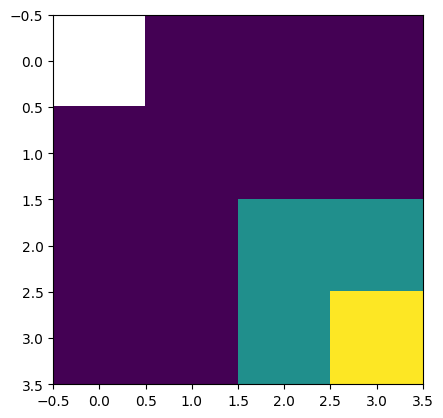

In [3]:
imshow(d[0, 0:4, 0:4])

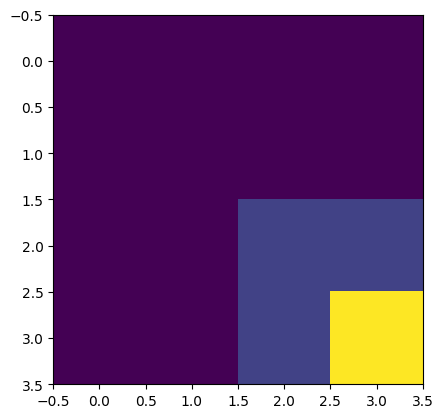

In [4]:
imshow(data_converted[3, 0:4, 0:4])

In [5]:
data_converted[3, 0:4, 0:4]

array([[  0,   0,   0,   0],
       [  0,   0,   0,   0],
       [  0,   0,  50,  50],
       [  0,   0,  50, 255]], dtype=uint8)